# 기본 설정

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd #판다스 패키지 불러오기
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression #로지스틱 회귀 모델 불러오기
from  sklearn.tree import DecisionTreeClassifier #의사결정 나무 모델 불러오기
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/dataset/train.csv') #모델 학습 파일
test = pd.read_csv('/content/drive/MyDrive/dataset/test.csv') #모델 시험지 파일
submission = pd.read_csv('/content/drive/MyDrive/dataset/submission.csv') #답안지  파일

# EDA

In [ ]:
#pd.DataFrame.head()
#데이터 프레임의 위에서 부터 n개의 행을 보여주는 함수
#이때 n의 기본값(default)은 5
pd.DataFrame.head(train)
#탑승객의 인적정보(행별로 저장이 되어 있음, 생존 유무 등)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
pd.DataFrame.head(test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
 pd.DataFrame.head(submission) #정답지 파일

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
#pd.DataFrame.tail()
#데이터 프레임의 아래에서 부터 n개의 행을 보여주는 함수
#n의 default: 5
pd.DataFrame.tail(train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
pd.DataFrame.tail(test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
pd.DataFrame.tail(submisson)

NameError: ignored

In [ ]:
#pd.DataFrame.shape
#데이터 프레임의 행, 열의 개수가 저장되어 있는 속성(attribute)
train.shape
#(행의 갯수, 열의 갯수)

In [ ]:
train.shape

In [ ]:
test.shape #survived column이 없기 때문에 train보다 열이 한 개 적음
submisson.shape

In [ ]:
train.info()

In [ ]:
 #pd.DataFrame.info()
 #데이터 셋의 column 별 정보를 알려주는 함수
 #비어있지 않은 값(non-null,결측값)은 몇 개인지?
 #column의 type -> int(정수), float(실수), object(문자열), 등등
 pd.DataFrame.info(train)

In [ ]:
pd.DataFrame.info(test)

In [ ]:
pd.DataFrame.info(submission)

In [ ]:
#pd.DataFrame.describe
#숫자형 column들의 기술 통계량을 보여주는 함수
train.describe()

In [ ]:
train.describe()

In [ ]:
#pd.Series.value_counts() 시리즈에서 사용되는 함수
#series 내 고유값들 각각의 개수를 보여주는 함수
#가장 많이 나오는 고유값을 순서로 보여줌
train['Embarked'].value_counts()

In [ ]:

import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(14,5))
labels = ['not survived','survived']
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%',labels = labels)

In [ ]:
#pd.DataFrame.groupby()
#집단간의 통계량
train.groupby('Sex').mean()

In [ ]:
labels=['3','2','1']
train['Pclass'].value_counts().plot.pie(autopct= '%d%%', labels = labels)

In [ ]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=False)

In [ ]:
train[['Pclass','Age']].groupby(['Pclass']).mean()

In [ ]:
train[['Family','Age']].groupby(['Family']).mean()

In [ ]:
from collections import Counter

Tck = []
for i in train['Ticket']:
    parts = i.split(' ')
    T1 = parts[0].strip()
    Tck.append(T1)
train['Ticket_num'] = Tck

ticket_counts = Counter(Tck)
TC=pd.Series(ticket_counts)
print(TC)
train[train['Ticket_num']=='PC']

In [ ]:

ticket_int = []
for i in TC:
    if isinstance(i, (int, float)):
        ticket_int.append(i)
sns.barplot(ticket_int)

In [ ]:
sns.distplot(x=train['Age'],bins=10)

In [ ]:
min(train['Age'])

In [ ]:
age_survival_ratio=[]
for i in range(0,80) :
  age_survival_ratio.append(train[train['Age'] < i]['Survived'].mean())
plt.plot(age_survival_ratio)
plt.title('Survival by Age')
plt.ylabel('ratio')
plt.show()

In [ ]:
train.corr()
corr_matrix = train.corr(method='pearson')
sns.heatmap(
    corr_matrix, annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title("Pearson Correlation Heatmap")
plt.show()

In [ ]:
train.groupby(['Sex','Survived'])['Survived'].count()
sns.countplot(x="Sex",hue="Survived",palette='pastel',data=train)

In [ ]:
sns.countplot(x='Embarked',hue='Survived',palette='pastel',data=train)

In [ ]:
sns.countplot(x="Title_top4", hue="Survived", data=train)
plt.show()

In [ ]:
sns.catplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train, kind='point')

In [ ]:
train[['Fare','Survived']].groupby(['Fare']).mean().sort_values(by='Survived',ascending=False)

In [ ]:
train[train['Fare']>400]

<Axes: >

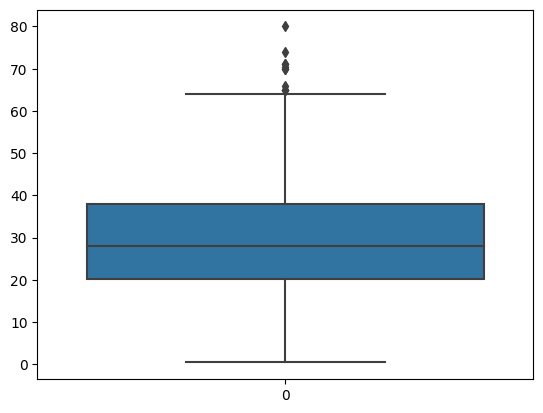

In [ ]:
sns.boxplot(train['Age'])

# 전처리

**결측값 채우기**

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
print(np.mean(before),np.mean(x), np.mean(y),'\n') #before: raw data, x: title, y: title+pclass
print(np.var(before), np.var(x), np.var(y))

In [ ]:
Initial= list(train['Name'])
Mr = []
for i in Initial:
    parts = i.split(',')
    name_title = parts[1].split('.')
    title = name_title[0].strip()
    Mr.append(title)

train['Title'] = Mr
train['Title'].value_counts()
top4_titles = ('Mr', 'Mrs', 'Miss', 'Master','other')
train['Title'] = train['Title'].map(
    lambda h: h if h in top4_titles else 'other')
for i in train['Name']:
    parts = i.split(',')
    name_title = parts[1].split('.')
    title = name_title[0].strip()
    Mr.append(title)

In [ ]:
###Title별로 나이 넣기###
M=[]
for a in top4_titles:
  M.append(train.loc[train['Title'] == a ,'Age'].mean())

for a, i in zip(top4_titles, M):
    train.loc[(train['Age'].isnull())&(train['Title'] == a), 'Age']= round(i)

In [ ]:
Initial= list(test['Name'])
Mr = []
for i in Initial:
    parts = i.split(',')
    name_title = parts[1].split('.')
    title = name_title[0].strip()
    Mr.append(title)
test['Title'] = Mr
test['Title'].value_counts()
top4_titles = ('Mr', 'Mrs', 'Miss', 'Master','other')
test['Title'] = test['Title'].map(
    lambda h: h if h in top4_titles else 'other')

M=[]
for a in top4_titles:
  M.append(test.loc[test['Title'] == a ,'Age'].mean())

for a, i in zip(top4_titles, M):
    test.loc[(test['Age'].isnull())&(test['Title'] == a), 'Age']= round(i)

In [ ]:
###train embarked 결측값###
Nanval = train.loc[((train['Sex']=='female')&(train['Pclass']==1)&(train['Family']==0)&(train['Survived']==1)),'Embarked'].value_counts(); print(Nanval)
print("\n")
Emval = train["Embarked"].value_counts(); print(Emval)
train.loc[(train['Embarked'].isnull()), 'Embarked'] = 'S'

C    17
S    14
Name: Embarked, dtype: int64


S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [ ]:
###test fare 결측값###
test.loc[(test['Pclass']==3)&(train['Age']>60)&(train['Age']<70),'Fare'].mean()
test.loc[(test['Fare'].isnull()),'Fare'] = 13.220833333333333

**이상값** **처리**

In [ ]:
train.loc[train['Fare'].astype(float) > 300, 'Fare'] = 300
test.loc[test['Fare'].astype(float) > 300, 'Fare'] = 300

In [ ]:
Q1 = train['Age'].quantile(0.25)
Q3 = train['Age'].quantile(0.75)

IQR = Q3 - Q1
Min = Q1 - 1.5 * IQR
Max = Q3 + 1.5 * IQR

outliers = (train['Age'] < Min) | (train['Age'] > Max)
print(train.loc[outliers,'Age'])

train.loc[(train['Age'] > Max), 'Age'] = 65

**변수** **변환**

Family column 생성

In [ ]:
train['Family'] = train['Parch'] + train['SibSp'] #동승자의 수를 나타내는 새로운 변수 생성
test['Family'] = test['Parch'] + test['SibSp']

In [ ]:
## Isalone 변수 생성
train['IsAlone'] = 0
train.loc[train['Family']==0,'IsAlone'] = 1
test['IsAlone'] = 0
test.loc[test['Family']==0,'IsAlone'] = 1

In [ ]:
train['Title'] = train['Title'].map({'Mr': 1, 'Mrs': 2, 'Miss':3,'Master':4,'other':5})
test['Title'] = test['Title'].map({'Mr': 1, 'Mrs': 2, 'Miss':3,'Master':4,'other':5})

In [ ]:
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1})
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1})

In [ ]:
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q':2})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q':2})

변수 drop

In [ ]:
drop_elements = ['PassengerId','Name','Ticket','Cabin']
train = train.drop(drop_elements,axis=1)
test = test.drop(drop_elements,axis=1)

In [ ]:
import scipy.stats

scipy.stats.ttest_rel(x,y)

In [ ]:
pd.DataFrame.head(train)

In [ ]:
pd.DataFrame.head(test)

In [ ]:
train.corr()
corr_matrix = train.corr(method='pearson')
sns.heatmap(
    corr_matrix, annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title("Pearson Correlation Heatmap")
plt.show()

In [ ]:
whole_df = train.append(test)
train_idx_num = len(train)


train = whole_df[:train_idx_num]
test = whole_df[train_idx_num:]

In [ ]:
from scipy import stats

shapiro_test = stats.shapiro(train['Age'])
print(shapiro_test)

# 모델링

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

In [ ]:
x_train = train[['Pclass',	'Age',	'Fare','Sex',	'Family',	'IsAlone','Embarked', 'Title','SibSp',	'Parch']]
y_train = train['Survived']
x_test = test[['Pclass',	'Age',	'Fare','Sex',	'Family',	'IsAlone','Embarked', 'Title', 'SibSp',	'Parch']]

In [ ]:
#로지스틱 회귀 모형 모델링
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_pred_probability = lr.predict_proba(x_test)[:,1]
submission['Survived'] = lr_pred
submission.to_csv('lr.csv', index=False)

In [ ]:
#로지스틱 회귀 모형 모델링
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_pred_probability = lr.predict_proba(x_test)[:,1]
y_test = lr_pred

In [ ]:
#의사결정 나무 모형 모델링
dt = DecisionTreeClassifier(max_depth=3, random_state=156)
dt_fit = dt.fit(x_train,y_train)
dt.predict(x_test)
dt_pred=dt.predict_proba(x_test)[:,1]
submission['Survived'] = dt_pred

submission.to_csv('dt.csv', index=False)

In [ ]:
#랜덤포레스트 모형 모델링
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=14, min_impurity_decrease= 0.0002, min_samples_split= 2, n_estimators= 10, random_state=42)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
rf.predict_proba(x_test)
rf_pred = rf.predict_proba(x_test)[:,1]
submission['Survived'] = rf_pred
submission.to_csv('rf.csv',index=False)

In [ ]:
#랜덤포레스트 모형 모델링
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
rf.predict_proba(x_test)
rf_pred = rf.predict_proba(x_test)[:,1]
y_test = rf_pred
test['Survived'] = y_test

In [ ]:
#앙상블트리모형 모델링
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
lr_model = LogisticRegression()

# VotingClassifier로 앙상블
ensemble_model = VotingClassifier(estimators=[
    ('random_forest', rf_model),
    ('gradient_boosting', gb_model),
    ('logistic_regression', lr_model)
], voting='hard')  # 'hard'는 다수결 투표, 'soft'는 각 분류기의 예측 확률의 평균 사용

ensemble_model.fit(x_train, y_train)
y_pred = ensemble_model.predict(x_test)
submission['Survived'] = y_pred
submission.to_csv('ens.csv', index=False)

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# 데이터의 클래스 분포에 맞게 Stratified K-Fold를 사용하여 교차 검증 수행
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 각 데이터 샘플이 속한 폴드와 해당 폴드의 샘플 수 출력
for fold_idx, (train_idx, test_idx) in enumerate(stratified_kfold.split(x_train, y_train)):
    num_samples_in_fold = len(test_idx)
    print(f"데이터 {test_idx}는 폴드 {fold_idx + 1}에 속하며, 해당 폴드에 할당된 샘플 수: {num_samples_in_fold}")

# cross_val_score를 사용하여 교차 검증 수행
cv_scores = cross_val_score(rf, x_train, y_train, cv=stratified_kfold, scoring='accuracy')

# 각 폴드에서의 정확도 출력
print("각 폴드의 정확도:", cv_scores)

# 평균 정확도 출력
print("평균 정확도:", cv_scores.mean())

NameError: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

params = { 'min_impurity_decrease': np.arange(0.0001,0.001,0.0001),
          'max_depth':range(5,20,1),
           'min_samples_split':range(2,100,20),
           'n_estimators': [50, 100]}
gs = GridSearchCV(RandomForestClassifier(random_state=42),params,n_jobs=-1)
gs.fit(x_train, y_train)

print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0002, 'min_samples_split': 2, 'n_estimators': 100}


NameError: name 'train' is not defined